In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

In [11]:
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.labelsize'] = 15
plt.rc('legend',fontsize=15) # using a size in points
import pygtc


In [19]:
plabels = np.array(["$M_{*}$", "$\\alpha$", "$\\sigma$"," $\\gamma$", "$\\beta$", "$\\tau$"])

priors = [[9.5,11.5], [-1,7], [0,5], [-2,2], [-3,2], [-2,2]]

beta_permutations = [0.2, 0.1, 0.0, -0.1, -0.2]

### beta permutations

In [20]:
beta1 = jsm_mcmc.single_chain("../../mcmc/paper_runs/model_C/beta/mock_1/chain.h5", Nstack=500, Nburn=500, Nthin=25)

beta2 = jsm_mcmc.single_chain("../../mcmc/paper_runs/model_C/beta/mock_2/chain.h5", Nstack=500, Nburn=500, Nthin=25)

beta3 = jsm_mcmc.single_chain("../../mcmc/paper_runs/model_C/beta/mock_3/chain.h5", Nstack=500, Nburn=500, Nthin=25)

beta4 = jsm_mcmc.single_chain("../../mcmc/paper_runs/model_C/beta/mock_4/chain.h5", Nstack=500, Nburn=500, Nthin=25)

beta5 = jsm_mcmc.single_chain("../../mcmc/paper_runs/model_C/beta/mock_5/chain.h5", Nstack=500, Nburn=500, Nthin=25)

In [21]:
save_file = "../../../paper_1/figures/beta_perm.pdf"

model_color = "darkorange"

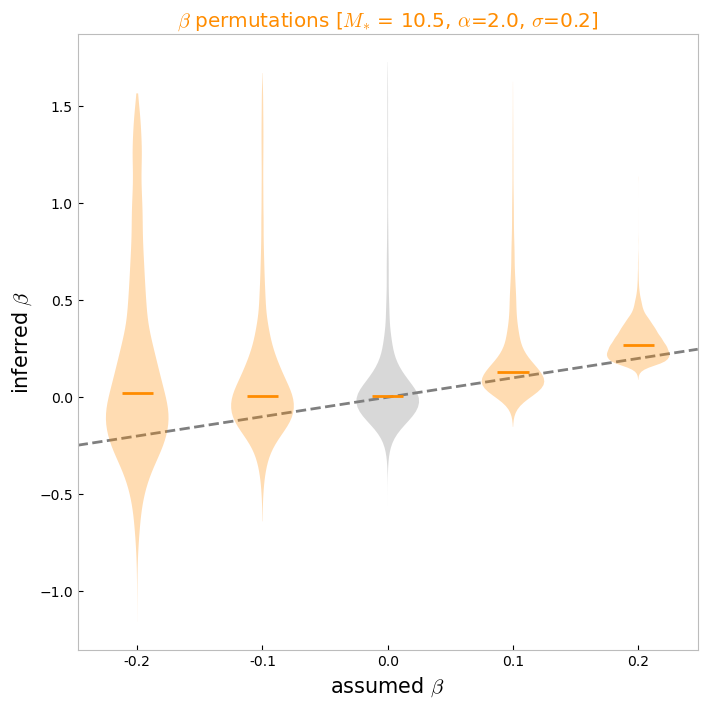

In [23]:
data = [beta1.thin[:,4], beta2.thin[:,4], beta5.thin[:,4], beta3.thin[:,4], beta4.thin[:,4]]
# Create a violin plot
plt.figure(figsize=(8, 8))

plt.title("$\\beta$ permutations [$M_{*}$ = 10.5, $\\alpha$=2.0, $\\sigma$=0.2]", color=model_color)
violins = plt.violinplot(data, showmeans=False, showmedians=True, positions=beta_permutations, widths=0.05, showextrema=False)

for i, violin in enumerate(violins['bodies']):
    if i == 2:
        violin.set_facecolor("grey")
    else:
        violin.set_facecolor(model_color)

violins['cmedians'].set_color(model_color)

plt.xticks(beta_permutations, ['0.2', '0.1', '0.0', '-0.1', '-0.2'])
plt.ylabel('inferred $\\beta$', fontsize=15)
plt.xlabel("assumed $\\beta$", fontsize=15)

xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', scalex=False, scaley=False, zorder=0, alpha=0.5)
plt.savefig(save_file, bbox_inches='tight')

plt.show()


In [16]:
plabels[[1,2,4]]
Ndim = 3

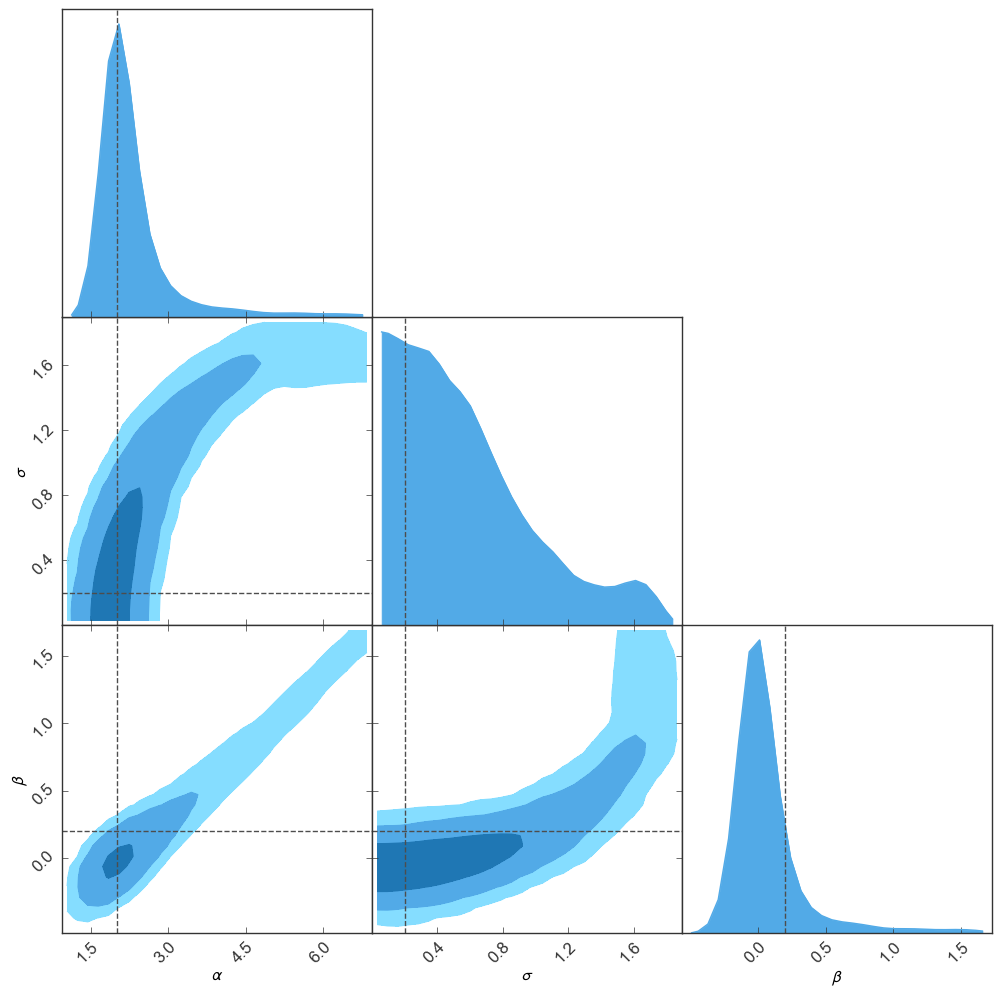

In [17]:
GTC = pygtc.plotGTC(chains=beta5.thin[:,[1,2,4]],
                paramNames = plabels[[1,2,4]],
                truths = [2.0, 0.2, 0.2],
                nContourLevels=3,
                figureSize=int(8*Ndim/2),
                smoothingKernel=1,
                filledPlots=True,
                customTickFont={'family':'Arial', 'size':12},
                customLegendFont={'family':'Arial', 'size':15},
                customLabelFont={'family':'Arial', 'size':12})

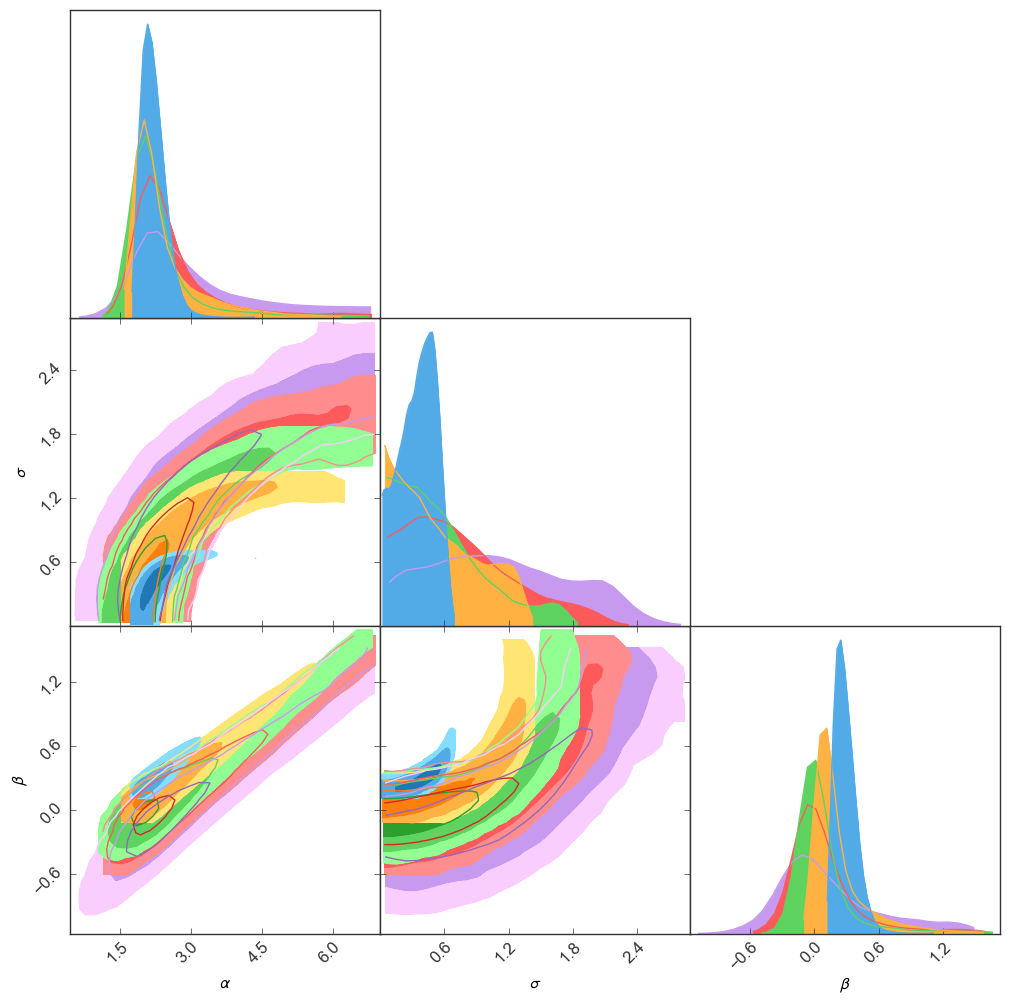

In [18]:
data = [beta1.thin[:,[1,2,4]], beta2.thin[:,[1,2,4]], beta5.thin[:,[1,2,4]], beta3.thin[:,[1,2,4]], beta4.thin[:,[1,2,4]]]

GTC = pygtc.plotGTC(chains=data,
                paramNames = plabels[[1,2,4]],
                nContourLevels=3,
                figureSize=int(8*Ndim/2),
                smoothingKernel=1,
                filledPlots=True,
                customTickFont={'family':'Arial', 'size':12},
                customLegendFont={'family':'Arial', 'size':15},
                customLabelFont={'family':'Arial', 'size':12})